# Reaction Rate Fields and Reactors

## Upgrade the Package `chbe444umd`
+ Upgrading will enable you to access its latest capabilities.
+ To install, run:
  >`%pip install chbe444umd`
+ To upgrade, run:
  >`%pip install --upgrade chbe444umd`
+ Restart the kernel after installing or upgrading.

## 0. Introduction

This script plots the reaction rate field for the familiar system A $\rightarrow$ B $\rightarrow$ C with first-order kinetics. This system was introduced in previous courses and HW 1, and analyzed further in lectures F.01 and F.02 of Module F.

The kinetics of the reactions are as follows:

|Reaction|Rate expression|Units|
|:------:|:-------------:|:----|
|$r_1$   | $k_1 C_A$     |$M/s$|
|$r_2$   | $k_2 C_B$     |$M/s$|

Due to the stoichiometry, the rates of formation of A and B are given by:

$$r_A = - k_1 C_A$$
$$r_B = k_1 C_A - k_2 C_B$$

Let us use the same rate constants we used in previous assignments involving this reaction system: $k_1 = 3 \ s^{-1}$, $k_2 = 2 \ s^{-1}$. 

## 1. Specify the Reaction System and Plot a Rate Field

### 1.1 Specify the reaction system

+ Let us define an reaction system object containing the component and reaction data, and give it the name `sysABC`.
+ In this package, reaction systems are objects in the class `ReactionSystem`.
+ If you need detailed help with the `ReactionSystem` class, run the following after `chbe444umd` has been imported as `des`:
  >`des.ReactionSystem?`
+ This will show you an example and descriptions of the arguments.

In [1]:
import chbe444umd as des

sysABC = des.ReactionSystem(
    component_ids=('A', 'B', 'C'),
    component_names={'A': 'A', 'B': 'B', 'C': 'C'},
    axes={'A': 0, 'B': 1},
    h_lim=[0, 1],
    v_lim=[0, 1],
    reactions=('r1', 'r2'),
    stoich={'r1': {'A': -1, 'B': 1},
            'r2': {'B': -1, 'C': 1}},
    kinetics={'r1': lambda C: 3 * C['A'],
              'r2': lambda C: 2 * C['B']},
    inequality=lambda C: C['A'] + C['B'] - 1
)

### 1.2 Examine input

 + No output appears after you run the previous cell. However, you can examine your input by running:
  >`sysABC`



### 1.3 Perform a sanity check to see if reaction rates are calculated correctly

+ The method `sysABC.rate(x)` gives the rates of formation of the axis components (in this case, $r_A$ and $r_B$) at a point in the concentration space denoted by the vector `x`.
+ As per the reaction stoichiometry:

$$r_A = -r_1$$
$$r_B = r_1 - r_2$$

+ Let us see if we get the correct rates corresponding to $C_A = 0.6 \ M$, $C_B = 0.4 \ M$.
+ We need to enter concentrations in the sequence the axis components are specified in `axes=` argument above. Thus, $C_A$ should be entered first (position 0) and $C_B$ should be entered next (position 1). Hence, the input `x` is `[0.6, 0.4]`.
+ The output should be $r_A = -1.8 \ M/s$, $r_B = 1.0 \ M/s$. Verify these numbers by calculating them yourself.

In [2]:
sysABC.rate([0.6, 0.4])

array([-1.8,  1. ])

### 1.4 Perform a sanity check to see if inequality status is calculated correctly

+ The method `sysABC.inequality_status(x)` gives the status of the inequality constraints at a point in the concentration space denoted by the vector `x`.
+ We entered constraint $C_A + C_B - 1$, which should be less than $0$ at a valid concentration point.
+ Let us try verify this at $(0.9, 0)$, which we know to be a valid point. If we get a negative value, the constraint is evaluated correctly.

In [3]:
sysABC.inequality_status([0.9, 0])

array(-0.1)

### 1.5 Plot a rate field

+ The following two "magic" commands (with the % sign) will render figures as scalable vector graphics (svg) format.
+ This will keep the figures sharp, without looking pixelated when zoomed in.
+ You just need to run them once in any Jupyter notebook in which you have graphics.

In [4]:
%config InlineBackend.figure_format='svg'
%matplotlib inline

+ The following command calls the method `plot_rate_field` on the `sysABC` object.
+ You can also run variations of the method like this:
>`sysABC.plot_rate_field()`  # simplest form with default options  
>`fig, ax, _ = sysABC.plot_rate_field(fsize=6, n_vec=41, arrow_scale=41)`
+ It is best to make the function return `fig` and `ax`, as we will need them for subsequent methods.

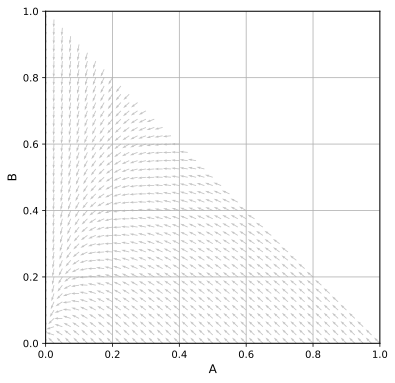

In [5]:
fig, ax, quiver = sysABC.plot_rate_field(fsize=6, n_vec=41, arrow_scale=41)

## 2. Specify and Simulate Reactors

### 2.1 Specify and Simulate a PFR and a CSTR

+ Reactors are instances of the `Reactor` class.
+ To get help with this class, run the following after `chbe444umd` has been imported as `des`:
  >`des.Reactor?`
+ Reactors are simulated by the `.simulate` method.
+ To get help with this method, run the following after `chbe444umd` has been imported as `des`:
  >`des.Reactor.simulate?`  
+ Or run the following after `pfr1` is specified:
  >`pfr1.simulate?`
+ Let us specify and simulate the following reactors:
  + PFR with fresh feed at $[1, 0]$,
  + CSTR with fresh feed at $[1, 0]$.
+ We can specify an integration or calculation time via the parameter `time` in the reactor specification or the parameter `time_limit` in the `.simulate` method.

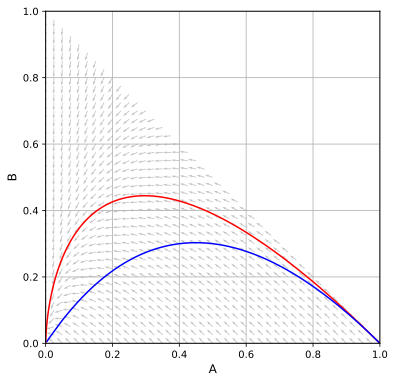

In [6]:
pfr1 = des.Reactor(name='PFR1', flow_type='pfr', feed=[1, 0], time=10)
pfr1.simulate(system=sysABC, ax=ax)

cstr1 = des.Reactor(name='CSTR1', flow_type='cstr', feed=[1, 0])
cstr1.simulate(system=sysABC, ax=ax, time_limit=100)

fig  # you may need to run this line to get the updated figure to display

### 2.2 Plot points on reactors

+ To locate and plot a point on a reactor curve, use the method `.plot_point`. For help on this method, run the following after `chbe444umd` has been imported as `des`:
  >`des.Reactor.plot_point?`
+ Points can be specified by $x$, $y$ or $\tau$ coordinates.
+ Points can also be specified by list comprehension. See how a series of points is plotted near the end of the cell.
+ If an exact match is not available, the point closest to the given coordinate(s) will be located.
+ Points can be annotated by setting the `annotation` argument as follows:
  + `annotation='tau'`
  + `annotation='x'`
  + `annotation='y'`
  + `annotation='xy'`
  + `annotation='all'`
+ If you do not need an annotation, use the option `annotate=False`.
+ It will be useful to try out points, tangents, and other constructions on a copy of the original figure. To duplicate a figure, use:
  >`fig1, ax1 = des.duplicate_figure(fig)`  # fig is the original figure, fig1, ax1 are the duplicated figure and axes

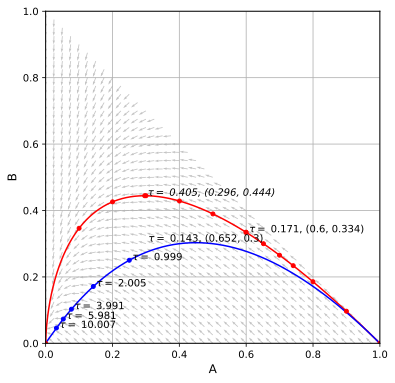

In [7]:
fig1, ax1 = des.duplicate_figure(fig)  # plot on a duplicate of original figure

pfr1.plot_point(ax1, x=0.6)  #  x-coordinate (CA) = 0.6
pfr1.plot_point(ax1, y=0.7, style='italic')  # y-coordinate (CB) = 0.7
ax1, point, text = pfr1.plot_point(ax1, y=0.3,  # y-coordinate (CB) = 0.3
                                   ha='right',  # ha: horizontal alignment
                                   va='bottom'  # va: vertical alignment
                                  )
pfr1.plot_point(ax1, tau=0.1, annotate=False)  # tau = 0.1, no annotation

# Plot a series points on both reactors for a range of tau
import numpy as np
[pfr1.plot_point(ax1, x=xx, annotate=False) for xx in np.linspace(0, 1, 11)]  # uniform series
[cstr1.plot_point(ax1, tau=t, annotation='tau') for t in (1, 2, 4, 6, 10)]  # nonuniform series

fig1  # you may need to run this line to get the updated figure to display

## 3. Perform annotations and attainable region (AR) constructions

## 3.1 Plot tangents to reactor curves

+ Although no tangents are needed to construct the AR for this problem, let us construct a couple of tangents for the sake of demonstration.
+ To plot a tangent, use the method `.plot_tangent`. See the examples below. To get help, run the following after `chbe444umd` has been imported as `des`:
  >`des.Reactor.plot_tangent?`

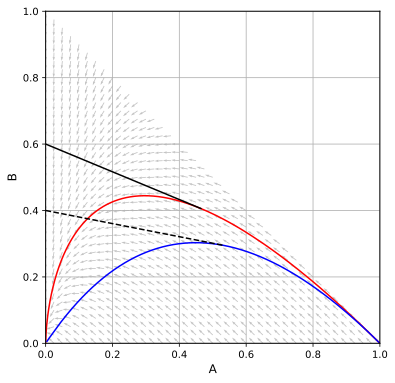

In [8]:
fig2, ax2 = des.duplicate_figure(fig)  # plot on another duplicate of original figure

ax2, tangent1 = pfr1.plot_tangent(ax2, from_point=[0, 0.6], color='k')  # 'k' = black
ax2, tangent2 = cstr1.plot_tangent(ax2, from_point=[0, 0.4], color='k',
                                   linestyle='--')
fig2

## 3.2 Plot convex hulls

+ We will plot two convex hulls for this reaction system: the attainable region (region below the PFR curve) and a convex hull that includes some of the reactors and tangents.
+ Convex hulls are plotted using the function `convexify`. To get help, run the following after `chbe444umd` has been imported as `des`:
  >`des.convexify?`
+ Before using this function, we will need to draw a line from $[0, 0]$ to $[1, 0]$ so that the PFR has a lower boundary below it.

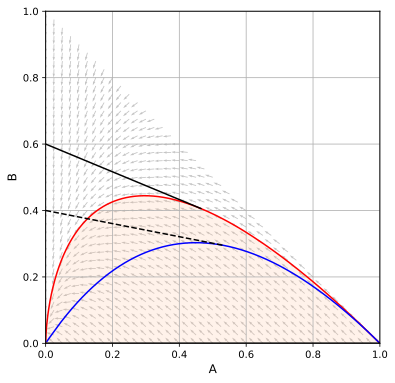

In [9]:
line1, = ax2.plot([1, 0], [0, 0], 'k-')  # 1st vector contains x's, 2nd vector contains y's

des.convexify(ax2, boundaries=[pfr1, line1],
              lw=0, color='#ffbe98', alpha=0.2)  # 1st convex hull (AR)

fig2

# lw=0 gives zero linewidth and preserves the reactor curves
# colors can be specified using hex format as above
# alpha=0.2 sets transparency (closer to zero is more transparent)

+ The following convex hull uses one of the tangents as its boundary.
+ As shown here, you can use the `hull` object returned by `des.convexify` to plot the edge of the convex hull.

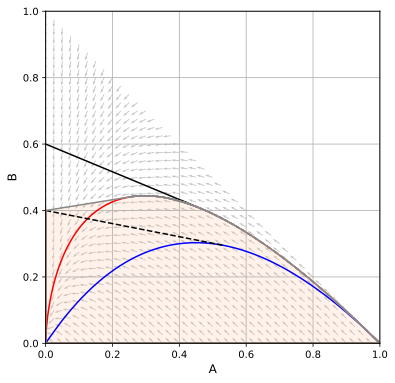

In [14]:
fig3, ax3 = des.duplicate_figure(fig)  # duplicate figure again

line1, = ax3.plot([1, 0], [0, 0], 'k-')
line2, = ax3.plot([0, 0], [0.4, 0], 'k-')
ax3, tangent1 = pfr1.plot_tangent(ax3, from_point=[0, 0.6], color='k')
ax3, tangent2 = cstr1.plot_tangent(ax3, from_point=[0, 0.4], color='k',
                                   linestyle='--')

# 2nd convex hull including the tangents
ax3, hull = des.convexify(ax3, boundaries=[pfr1, line1, line2, tangent2],
                          color='#ffbe98', alpha=0.2)

# Plot the boundary of the hull from the object returned by the previous command
[ax3.plot(hull.points[simplex, 0],
          hull.points[simplex, 1],
          color='#888888',
          ls='-')
 for simplex in hull.simplices]

fig3